In [1]:
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# DFT

The Discrete Fourier Tranform, or DFT, is an important concept in signal theory, mathematics, and has important implications for music processing. The DFT is a process for decomposing a harmonic signal into it's individual components. Recall that in the first half we learned how to build sounds by adding sinusoids. In fact, *any compound waveform can be represented as the sum of multiple sinusoids.*

Because of this, the DFT allows us to *decompose* a signal into the parts from which it is summed.

The DFT can be understood as (a) the projection of a signal into a finite set of complex sine waves, or (b) a set of correlation values representing how similar the overall input signal is to a series of individual frequencies.

It is able to figure out how much of each sinusoidal ingredient is present in the signal. (Where each sinusoid has a period equal to k over N samples.)

### The DFT equation is shown below:

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} , k = 0, ..., N-1$$

This equation is at the heart of all signal processing theory. It is important not to be afraid of this equation, but rather to understand the conceptual logic of it if you want to have a deep understanding of the DFT. Let's break down the components of this equation first.

- x(n) is our input signal
- x(n) is multiplied by a complex signal that we can think about as $e^{-j\omega_{k}n}$ for a moment
- the $e^{-j\omega_{k}n}$ represents a given sinusoid/frequency bin
- by multiplying x(n) with $e^{-j\omega_{k}n}$, we are:
    - performing the dot product of x(n) with the complex sinusoid
    - determining the correlation of x(n) with the complex sinusoid (determined by $\omega$)

If we breakdown our complex exponential, we get

$$e^{-j 2\pi k n/N}$$

- N is the total number of samples
- k is the discrete frequency index (or bin)
- n is the discrete time index 

Which means...
- $\omega_{k}$ = $2\pi k/N$ = frequency in radians

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} k = 0, ..., N-1$$

So if we put it in context...

$x$ is the input signal, where sample by sample ($x(n))$ is multiplied by a complex sinusoid at each value of k, then we sum over N (the total number of samples), and as a result we obtain a complex vector ($X$) (the spectrum).

The spectrum obtained by the DFT returns a complex function that can be expressed with a magnitude and a phase. In the magnitude spectrum, we identify the frequency content of the signal. And in the phase spectrum, we see how the sinusoids are placed within the cycle length in radians with respect to time = zero.

### Dot Product, Basis Vector, Euler

Let's figure out why/how this happens.

From Linear Algebra, we know that the dot product gives how "similar" one vector is to another.

If vectors are positively correlated, the dot product will be > 0.
If they are orthogonal, the dot product will be 0.

The dot product also gives the coordinates of a vector relative to a basis.

Let's work with the vector v = (3, 4) in a 2d plane.

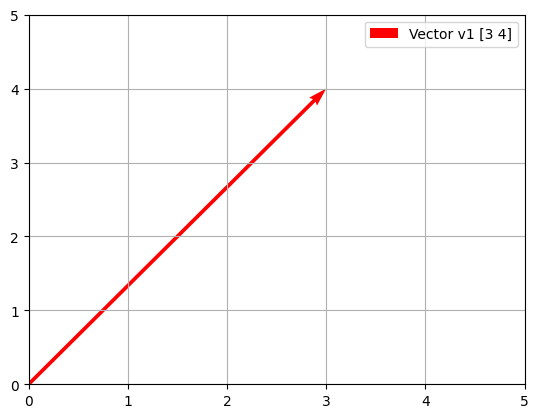

In [2]:
v = np.array([3,4])

# Plotting the vectors
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Vector v1 {v}')

# Set plot limits and labels
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid()
plt.show()

We can also represent this vector as the linear combination of the unit vectors.

Where $\hat{x} = (1,0)$ and $\hat{y} = (0,1)$

$$\vec{v} = A\hat{x} + B\hat{y}$$



To find $A$ and $B$, we simply take the dot product of $\vec{v}$ with $\hat{x}$ and $\hat{y}$ respectively.

$$A = \vec{v} \cdot \hat{x} = 3\cdot1 + 4\cdot0 = 3$$
$$B = \vec{v} \cdot \hat{y} = 3\cdot0 + 4\cdot1 = 4$$

A and B here represent how much our vector should be projected onto the x and y vectors.

Or, to put it another way

$$\vec{v} = \sum_{n=0}^{N} (\vec{v} \cdot \hat{x}_n)\hat{x}_n$$

$\hat{x}$ and $\hat{y}$ form an __orthonormal basis__ of the 2D plane.
- __Basis:__ a set of elements within a vector space such that __*any*__ other vector within the space can be represented as a linear combination of elements within the basis
    - $A\hat{x} + B\hat{y}$
- __Orthogonal:__ Dot product of different elements is $0$.
- __Normal:__ Dot product of an element with itself is $1$.


We can use sin and cos to create an orthogonal basis. 

Such that $Acos(\omega_{k}n) + Bsin(\omega_{k}n)$ where $\omega_{k}$ = $2\pi k/N$

When we solve for A and B given an input vector (signal) using the dot product, we can determine how "similar" that vector is to each component of the basis.

This gives us two real components with which we can determine the amount of each sin and cos to reconstruct a signal with a given frequency 

In [3]:
N = 8
n = np.arange(0, N)
k = 1
sig_freq = 1

sig = np.sin(2*np.pi * sig_freq * n / N)

x = np.cos(2*np.pi * k * n / N)
y = np.sin(2*np.pi * k * n / N)

A = 2/N * np.dot(sig, x)
B = 2/N * np.dot(sig, y)

print("Cos coeff for " + str(k) + " frequency: " + str(A))
print("Sin coeff for " + str(k) + " frequency: " + str(B))

Cos coeff for 1 frequency: 5.837174559431274e-17
Sin coeff for 1 frequency: 1.0


For each frequency, k, the signal can be represented by two coordinates: one along cosine and one along sine.

This shows us that for the 1st frequency bin (when k = 1), all of the "energy" is in the sine component with none on the cosine.

$$X_a[k] = Acos(\omega_{k}n)$$
$$X_b[k] = Bsin(\omega_{k}n)$$

Practically, we do not like to track 2 coefficients (sine and cos). So, instead we use Euler's formula and complex exponentials. 

Here is Euler's identity:

$$e ^{j\pi} +1 =0$$

We can use it get this identity:

$$e^{-j\theta}=cos\theta−jsin\theta$$

This helps us move from
$$X_a[k] = Acos(\omega_{k}n)$$
$$X_b[k] = Bsin(\omega_{k}n)$$

to...

$$e^{-j\omega_{k}n} = \cos(\omega_{k}n) - j\sin(\omega_{k}n)$$

So now, instead of taking the dot product of both sine and cos against the signal, we can just perform it once against the complex exponential and get a complex number to represent our coefficient

$$X[k] = A_k - jB_k = \sum_{n=0}^{N-1} x(n) \cdot e^{-j\omega_{k}n}$$


### Complex Numbers

A complex number is any number with a real and an imaginary component. The complex number can be written as $a+jb$ where $j$ (or $i$) is the imaginary unit.

Knowing how to manipulate these complex numbers is therefore useful.

$a$ is called the `real` part of the number and $b$ is called the `imaginary` part of the number

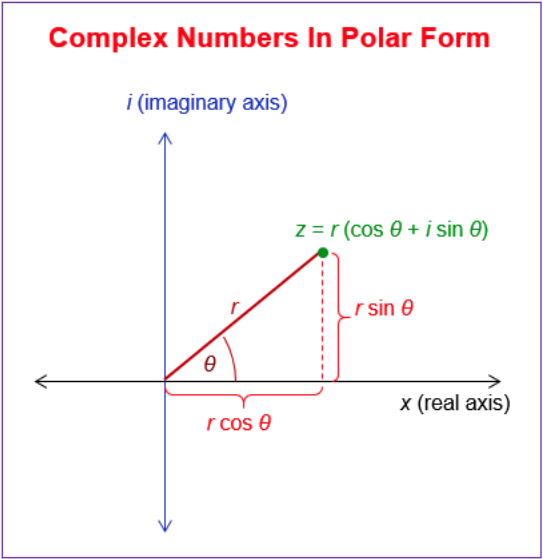

In [4]:
from IPython.display import Image
Image('../images/polarRectangular.png',width=400)

#### Rectangular to polar form of complex numbers

So we can express a point in a complex plane (i.e., a sample) in three ways:

$Z = a + jb$

or

$Z = r \angle \theta$

or

$Z = r(cos\ \theta + j\ sin\ \theta)$

conversion reminders:
To convert between these forms, the following are helpful reminders:

$sin\theta = \frac{b}{r}$

$cos\theta = \frac{a}{r}$

$r = \sqrt{a^2 + b^2} $

$\theta = arctan(\frac{b}{a})$

Or, to convert from polar to rectangular:

$a = r\ cos\theta$

$b = r\ sin\theta$

The absolute value of $Z$ is equal to $\sqrt{a^2 + b^2}$ which represents the length of the radius. This translates to the magnitude (or amplitude) of the sinusoidal component

The argument of Z is equal to $arctan(\frac{b}{a})$ which represents the phase of the component

And recall that there is nothing "imaginary" about $j$, it is simply a number whose square equals one: 

$j = \sqrt{-1}$

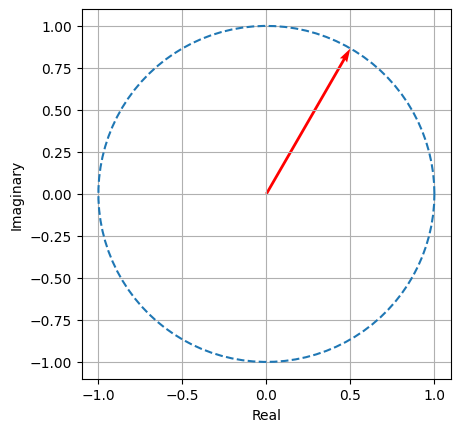

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
z = np.exp(1j * theta)

plt.figure()
plt.plot(np.real(z), np.imag(z), '--')

# Pick a specific angle
theta0 = np.pi / 3
z0 = np.exp(1j * theta0)

plt.quiver(0, 0, np.real(z0), np.imag(z0),
           angles='xy', scale_units='xy', scale=1,
           color='r')

plt.gca().set_aspect('equal')

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
plt.show()

### Back to DFT...

If we want to perform a DFT on a signal of size N = 4, we will have 4 samples (n=0,1,2,3) and therefore 4 frequency bins (k=0,1,2,3) as output of the DFT. If we model this output for some sample, s, of length 4, we can see the signal will be projected to these four sine waves.

$s_0 = \cos(2\pi * 0 * n/4) - j\sin(2\pi * 0 * n/4) = [1,1,1,1]$  
$s_1 = \cos(2\pi * 1 * n/4) - j\sin(2\pi * 1 * n/4) = [1,-j,-1,j]$  
$s_2 = \cos(2\pi * 2 * n/4) - j\sin(2\pi * 2 * n/4) = [1,-1,1,-1]$  
$s_3 = \cos(2\pi * 3 * n/4) - j\sin(2\pi * 3 * n/4) = [1,j,-1,-j]$

If we create a concrete example where for a 1Hz signal for 4 samples, we can calculate the **dot product** on one basis

In [6]:
import numpy as np

N = 4
n = np.arange(0, N, 1)

k = 1
sig_freq = 1

sig = np.sin(2*np.pi * sig_freq * n / N)

basis = np.cos(2*np.pi * k * (n / N)) - 1j * np.sin(2*np.pi * k * (n / N))
# (equivalently: basis = np.exp(-1j * 2*np.pi * k * n / N))

A = (1/N) * np.vdot(sig, basis)

print(basis)
print("Coeff for " + str(k) + " frequency: " + str(np.round(np.abs(A), 1)))


[ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
Coeff for 1 frequency: 0.5


If we create a concrete example where we compute the **scalar product** (or **dot product** e.g., multiply the signal by each basis function and sum):

In [8]:
sig = np.sin(2*np.pi * sig_freq * n / N) #create example signal
X_k = np.array([])

for k in range(4): 
    n_k = np.array([])
    for n in range(4):
        s_i = np.cos(2*np.pi*k*(n/4)) - 1j*(np.sin(2*np.pi*k*(n/4))) #create each sample of each basis function at all values of k
        print('n=',n,s_i)
        n_k = np.append(n_k, s_i)
    print('k equals',k,':',n_k)
    sc_prod = sum(n_k*sig) #compute scalar product of signal and basis function
    #there is also a numpy function for this: 
    #sc_prod = np.dot(n_k,sig)
    X_k=np.append(X_k,sc_prod)

np.round(np.abs(X_k),1) # all of signal projects onto k = 0

n= 0 (1+0j)
n= 1 (1+0j)
n= 2 (1+0j)
n= 3 (1+0j)
k equals 0 : [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
n= 0 (1+0j)
n= 1 (6.123233995736766e-17-1j)
n= 2 (-1-1.2246467991473532e-16j)
n= 3 (-1.8369701987210297e-16+1j)
k equals 1 : [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
n= 0 (1+0j)
n= 1 (-1-1.2246467991473532e-16j)
n= 2 (1+2.4492935982947064e-16j)
n= 3 (-1-3.6739403974420594e-16j)
k equals 2 : [ 1.+0.0000000e+00j -1.-1.2246468e-16j  1.+2.4492936e-16j
 -1.-3.6739404e-16j]
n= 0 (1+0j)
n= 1 (-1.8369701987210297e-16+1j)
n= 2 (-1-3.6739403974420594e-16j)
n= 3 (5.51091059616309e-16-1j)
k equals 3 : [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
 -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]


array([0., 2., 0., 2.])

The absolute value of the scalar product may be interpreted as a measure of similarity between two vectors $x$ and $y$: if $x$ and $y$ point to the same direction (i.e., they are similar), the scalar product $|⟨𝑥|𝑦⟩|$ is large. If $x$ and $y$ are orthogonal (i.e., they are dissimilar), the inner product $|⟨𝑥|𝑦⟩|$ is zero.

Note: k is an index of a frequency bin. It is a frequency normalized over N (i.e., the total number of samples used in the transformation), while f usualy denotes frequency in Hz. It's basically the same thing in different units. "k" is the number of periods in the N samples, "f" is the number of periods in a single second (or, usually, in 44,100 samples).

So, in other words, we essentially extract the energy under each of these frequency "bins", or k periods inside the N samples. Think of the above as four "filters" to measure each possible "sinusoidal ingredient."

Let's look at a basic example. We'll generate a complex sinusoid of length 64 and k = 7. So this means we will have seven cycles over the time period of length N (64).

In [11]:
N = 64
k = 7
n = np.arange(0, N)
s = np.exp(1j * 2*np.pi * sig_freq * n / N)


Here we can plot that to see that it looks right. **Note that by default if you pass a complex value to many functions it will automatically ignore the imaginary part.** This is true for `plt.plot` as well so we have to explicitly pass the real and imaginary parts separately.

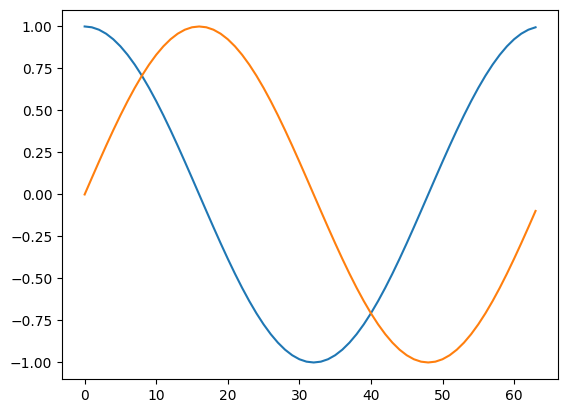

In [12]:
plt.plot(n, np.real(s), n, np.imag(s))

(array([1.94465896e-06, 1.19850970e-17, 1.94465896e-06, 3.91294368e-06,
        5.92918520e-06, 8.01916464e-06, 1.02109407e-05, 1.25358106e-05,
        1.50294685e-05, 1.77334439e-05, 2.06969352e-05, 2.39791945e-05,
        2.76526911e-05, 3.18073810e-05, 3.65565703e-05, 4.20451109e-05,
        4.84610728e-05, 5.60527041e-05, 6.51536270e-05, 7.62212009e-05,
        8.98965805e-05, 1.07101764e-04, 1.29202259e-04, 1.58291650e-04,
        1.97715398e-04, 2.53096167e-04, 3.34499908e-04, 4.61479858e-04,
        6.76448413e-04, 1.08727532e-03, 2.04835813e-03, 5.51028725e-03,
        5.11730448e-01, 1.00000000e+00, 5.11730448e-01, 5.51028725e-03,
        2.04835813e-03, 1.08727532e-03, 6.76448413e-04, 4.61479858e-04,
        3.34499908e-04, 2.53096167e-04, 1.97715398e-04, 1.58291650e-04,
        1.29202259e-04, 1.07101764e-04, 8.98965805e-05, 7.62212009e-05,
        6.51536270e-05, 5.60527041e-05, 4.84610728e-05, 4.20451109e-05,
        3.65565703e-05, 3.18073810e-05, 2.76526911e-05, 2.397919

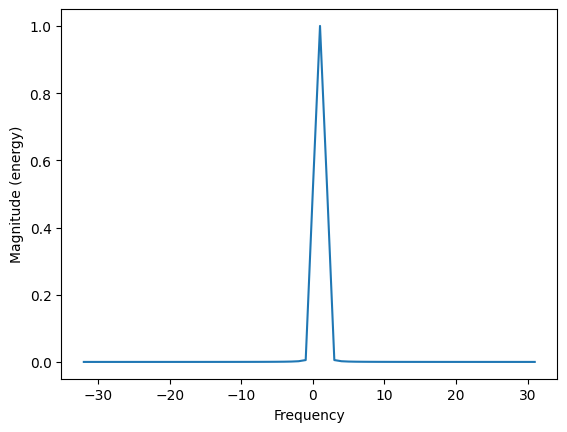

In [14]:
# recall pyplot has a "magnitude_spectrum" plotting function we can use for now - it assumes real-valued input
# notice that it cannot interpret the values of k (x axis) if we do not pass it a sample size. Using the wrong N will give erroneous output.
plt.magnitude_spectrum(s, Fs=N)

Obviously, this is very perfect. It means that the entire signal projects onto (or correlates entirely with) one single sinusoidal coefficient (k = 7). This never happens when dealing with "real world" signals.

The magnitude spectrum for a complex sinusoid will have a single peak, whereas a real-valued sinusoid (i.e., not complex) will look like it has two (one positive, one negative around center at 0)

Let's demonstrate how this works with a real sinusoid. Recall that a real sinusoid can be expressed as the sum of two complex exponentials, so the DFT output for a single real-valued sinsoid will show two peaks. 

$$\cos(\omega t) = \frac{1}{2}(e^{j \omega t} + e^{-j \omega t})$$

We'll create a real-valued signal with the same properties as before:

In [21]:
N=64
k0 = 7
n = np.arange(N)
# s is real not complex:
s = np.cos(2* np.pi * k0 * n/N)# create a REAL signal at k0 = 7

X = np.array([]) #create empty array
#iterate over all sample indices:
for k in range(N):
    xp = np.exp(-1j * 2 * np.pi * k * n / N) #create complex exponential (i.e., frequency) at every k
    X = np.append(X, sum(s*xp))


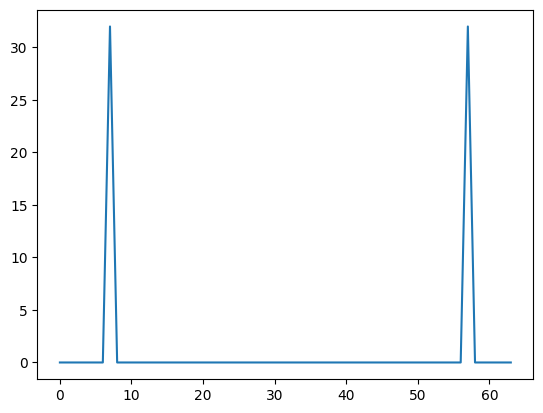

In [22]:
plt.plot(np.abs(X))

However, these values are misleading - they are plotted with regards to the values of x which are index values from 0 to 64. Because it *should represent* a symmetrical output around zero, we need to change how we calculate N. So instead of 0 : 64, we divide N by two and show from -N/2 to positive N/2. (Since we want to calculate and display the correct values of 7 and -7).

In fact, when working with real signals what's better is to create a different set of incides for the frequency and samples, that actually run from -N/2 to N/2 just to keep everything clear and tidy.

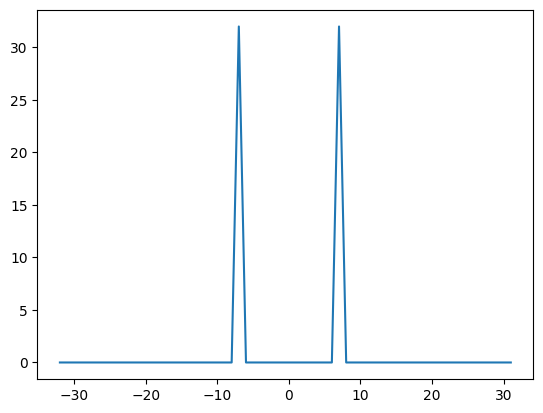

In [25]:
N=64
k0 = 7
n = np.arange(N)
s = np.cos(2* np.pi * k0 * n/N)

kv = np.arange(-N/2, N/2)
X = np.array([])
for k in kv:
    xp = np.exp(-1j * 2 * np.pi * k * n / N)
    X = np.append(X, sum(s*xp))

plt.plot(kv, abs(X))

## Properties of DFT

**The resolution of k depends on the number of samples N.** We will obtain a more dense sampling along the frequency axis if we have longer samples (up to a point). Therefore, a larger value of N is expected to produce a finer representation of the signal in the frequency domain, (i.e. a better *frequency resolution*.)

However, this increasing frequency resolution is valid, **only as long as the signal remains stationary**, (i.e. as long as its properties do not change over time). When the signal changes over time, this DFT cannot be performed over the entire signal, we instead need to "cut up" the signal into fragments of time that are as unchanging as possible and compute the DFT over each one.

(More on this next time.)

## IDFT
One of the nice things about the DFT is that it is recomposable (or invertible). That is, we can get back the original signal from its spectrum. So it's a kind of synthesis, because we are recreating a whole out of many parts.

In order to run the inverse DFT, we take $X$, which is now our input vector of length N, (i.e., the resulting output of a DFT), and we return a set of samples--also of length N--which represent our original signal. 

The formula for the IDFT is very similar to the DFT (which is to be expected). 


$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi k n/N} , n = 0,...,N-1$$

...where the weight of each complex exponential is equal to the kth DFT coefficient. Said another way, 
X[k] can be understood as a measure of the intensity with which the respective frequency participates in
the signal x(n).

By summing these sinusoids, we are effectively performing the same synthesis activity we did earlier in the semester.

In [26]:
# 'X' was the variable of the stored output of the DFT

N = 64
nv = np.arange(N) # indices for samples
kv = np.arange(-N/2, N/2) # indices for frequency

y = np.array([])
#recall capital 'X' above is our output from the DFT (or spectrum values)
#now iterate over n
for n in nv: 
    xp = np.exp(1j * 2 * np.pi * kv * n / N) #create complex exp at every n
    y = np.append(y, 1.0/N * sum(X*xp)) #note the factor of 1/N to normalize

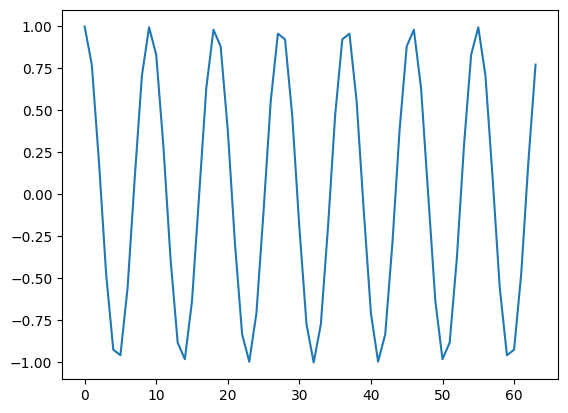

In [27]:
plt.plot(nv, y.real)